In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
import io
from google.colab import files
uploaded=files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [4]:
gold_data=pd.read_csv(io.BytesIO(uploaded['gld_price_data.csv']))

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<ipython-input-8-ca78315192aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gold_data.corr(),annot=True,annot_kws={'size':8},fmt='.1f',color='Blue')


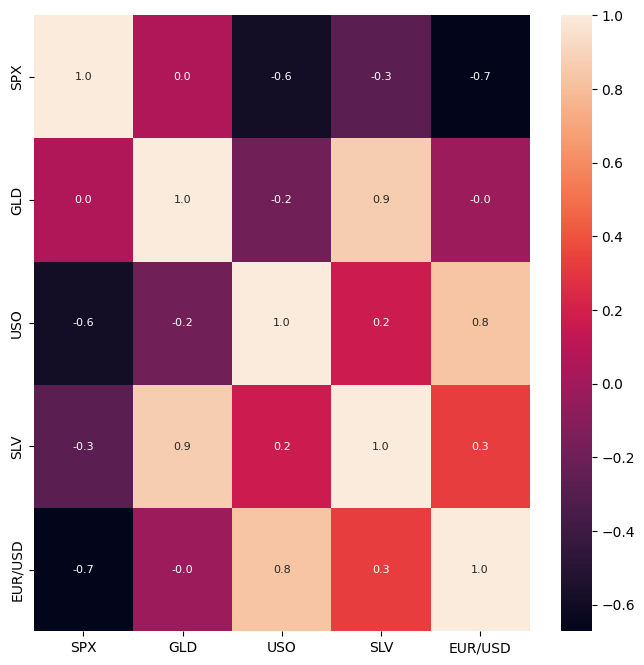

In [8]:
#correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(gold_data.corr(),annot=True,annot_kws={'size':8},fmt='.1f',color='Blue')
plt.show()

In [11]:
correlation=gold_data.corr()
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-8efe12d31266>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<ipython-input-12-8a0cd6b1cf17>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='orange')


<Axes: xlabel='GLD', ylabel='Density'>

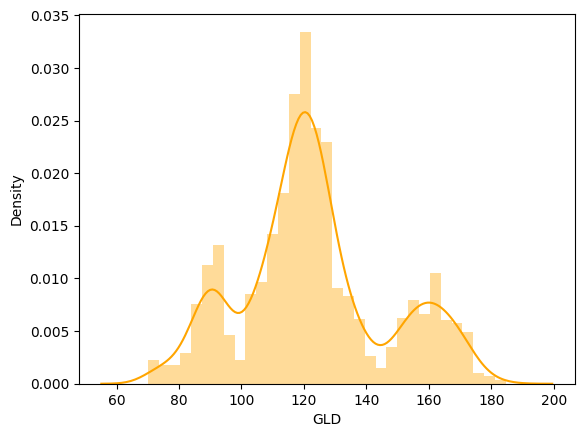

In [12]:
#Distribution of Gold prices
sns.distplot(gold_data['GLD'],color='orange')

In [13]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [14]:
scaler=StandardScaler()

In [15]:
sta_data=scaler.fit_transform(X)

In [17]:
X=sta_data

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model=RandomForestRegressor(n_estimators=100)

In [23]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
X_test_prediction=model.predict(X_test)

In [25]:
#R squred score
error_score=metrics.r2_score(y_test,X_test_prediction)
print(f'R squared score: {error_score}')

R squared score: 0.9893202351131377


In [26]:
actual_price=list(y_test)

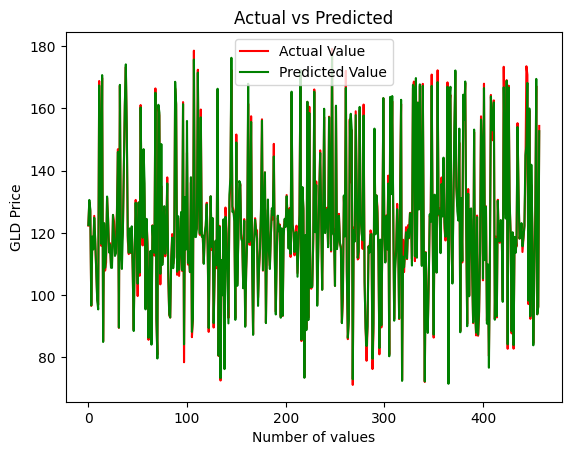

In [30]:
plt.plot(actual_price,color='red',label="Actual Value")
plt.plot(X_test_prediction,color='green',label="Predicted Value")
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()